## Final Project Submission

Please fill out:
* Student name: Yeonjae Zhang
* Student pace: full time
* Scheduled project review date/time: April 1st, 2022 Friday
* Instructor name: Praveen Gowtham
* Blog post URL: 


# Overview
Home buyer as family person requested the guide line to buy a house.

# Business Problem
The stakeholder previously bought a house that was overvalued and far from his son’s school. His family was unimpressed.

# Data Understanding

In [1]:
# import standard packages
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf

### King County House Data
King County real estate data for homes sold in and around King County,  Washington.

In [2]:
# explore the data
df = pd.read_csv('data/kc_house_data.csv')
df2 = pd.read_csv('data/middle_school_hd.csv')

object dtype: Date, waterfront, view, condition, grade, sqft_basement

In [3]:
# check all the dtype is numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Middle school distance data
Middle school locations in King County. We are able to calculate the distances from the houses in King County real estate data. 

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,HubName,HubDist
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,6374.645877,1.264706
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,621.799657,1.049036
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,5103.000000,0.020115
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,5893.000000,0.689758
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,6399.000000,1.069560
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6827.000000,1.588646
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7592.000000,24.952758


In [7]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,HubName,HubDist
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,6219,1.750332
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,False,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7170,1.440778
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,False,NONE,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,5516,1.243018
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,False,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,6214,1.473385
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,False,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,5338,0.687628


# Data Preparation
Prepare the data for house price prediction model

### Data Cleaning
I drop NaN, encode categorical variables and find correlated variables with price

In [8]:
# drop NaN
cleaned_df = df.dropna()

In [9]:
# sqft_basement is not categorical varibale but have to change dtype to float.
cleaned_df.sqft_basement.value_counts()

0.0       9362
?          333
600.0      155
500.0      151
700.0      148
          ... 
2010.0       1
1481.0       1
1913.0       1
4820.0       1
248.0        1
Name: sqft_basement, Length: 283, dtype: int64

In [10]:
# sqft_basement have '?' value that is string. I drop '?' values.
cleaned_df = cleaned_df.loc[cleaned_df.sqft_basement != '?']
cleaned_df.sqft_basement = cleaned_df.sqft_basement.astype('float')

In [11]:
# drop NaN
cleaned_df2 = df2.dropna()

# Data Analysis

### Correlation features with price

In [12]:
# import library
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

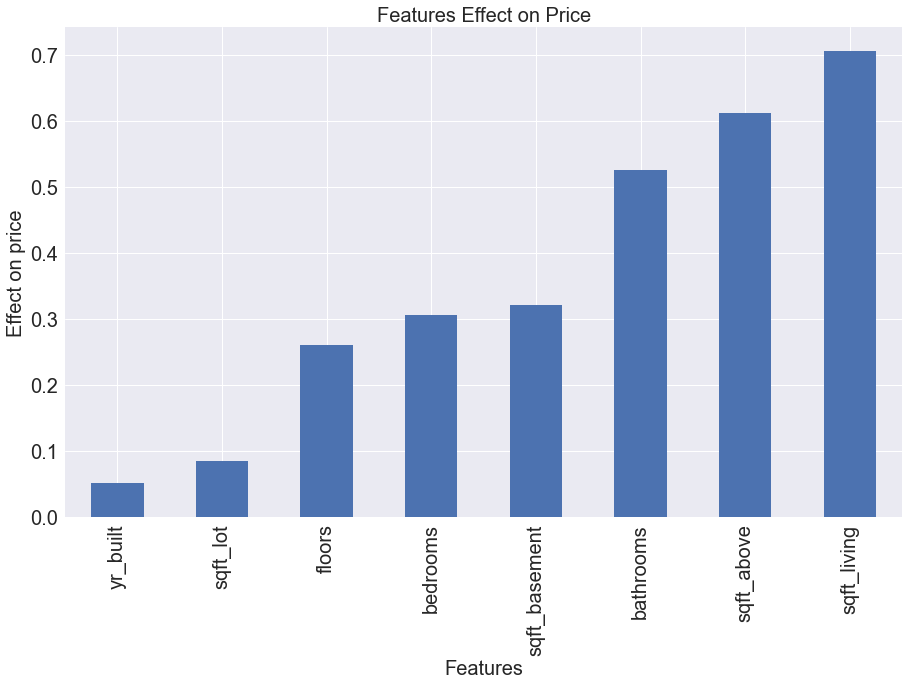

In [13]:
# plot continuous variables with price
corr_df = abs(cleaned_df.corr().iloc[2:10])['price'].sort_values()
corr_df.plot.bar(figsize=(15,9), fontsize=20)
plt.title('Features Effect on Price', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Effect on price', fontsize=20)
plt.show()

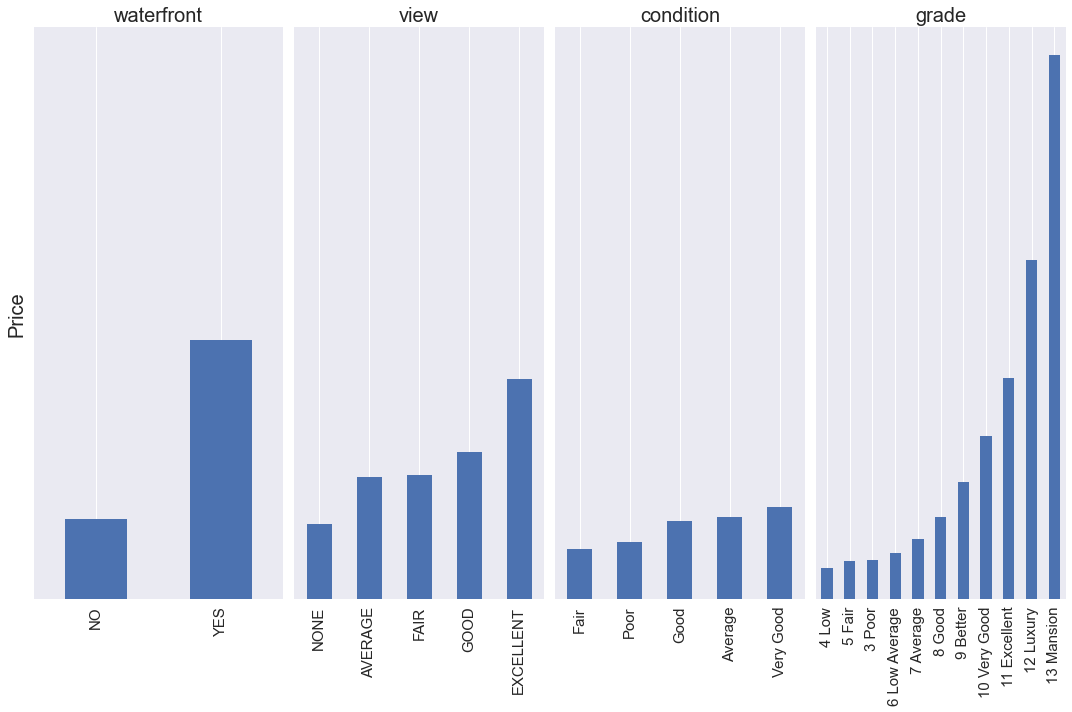

In [14]:
# plot categorical variables with price except date

fig, axes2 = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 10), sharey = True)

categoricals = ['waterfront', 'view', 'condition', 'grade']

for col, ax in zip(categoricals, axes2.flatten()):
    cleaned_df.groupby(col).mean()['price'].sort_values().plot.bar(ax=ax, fontsize=15)
    ax.set(xlabel=None)
    ax.set_title(col, fontsize=20)
    ax.set_yticks([])
    ax.set_ylabel('Price', fontsize=20)
fig.tight_layout()

# Feature Engineering

### Preprocess Train Data

In [15]:
# preprocessing with scikit-learn
y = cleaned_df['price']
X = cleaned_df.drop('price', axis=1)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

X_train is a DataFrame with 11571 rows and 20 columns
y_train is a Series with 11571 values


In [18]:
# Select relevant Columns
relevant_columns = ['bathrooms',
                    'bedrooms',
                    'sqft_living',
                    'waterfront',
                    'view',
                    'condition',
                    'grade',
                    'sqft_basement',
                    'lat',
                    'floors',
                    'sqft_above'
                    ]

# Reassign X_train so that it only contains relevant columns
X_train = X_train.loc[:, relevant_columns]

In [19]:
X_train.isna().sum()

bathrooms        0
bedrooms         0
sqft_living      0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
lat              0
floors           0
sqft_above       0
dtype: int64

In [20]:
# Convert Categorical Features into Numbeers
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11571 entries, 560 to 10173
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      11571 non-null  float64
 1   bedrooms       11571 non-null  int64  
 2   sqft_living    11571 non-null  int64  
 3   waterfront     11571 non-null  object 
 4   view           11571 non-null  object 
 5   condition      11571 non-null  object 
 6   grade          11571 non-null  object 
 7   sqft_basement  11571 non-null  float64
 8   lat            11571 non-null  float64
 9   floors         11571 non-null  float64
 10  sqft_above     11571 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.1+ MB


In [21]:
# date, waterfront, view, condition, and grade are objects
from sklearn.preprocessing import OrdinalEncoder


In [22]:
# waterfront transform
waterfront_train = X_train[['waterfront']]
encoder_waterfront = OrdinalEncoder(categories=[['NO', 'YES']])
encoder_waterfront.fit(waterfront_train)
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)
waterfront_encoded_train = waterfront_encoded_train.flatten()
X_train['waterfront'] = waterfront_encoded_train

In [23]:
# view transform
view_train = X_train[['view']]
encoder_view = OrdinalEncoder(categories=[['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']])
encoder_view.fit(view_train)
view_encoded_train = encoder_view.transform(view_train)
view_encoded_train = view_encoded_train.flatten()
X_train['view'] = view_encoded_train

In [24]:
# condition transform
condition_train = X_train[['condition']]
encoder_condition = OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good']])
encoder_condition.fit(condition_train)
condition_encoded_train = encoder_condition.transform(condition_train)
condition_encoded_train = condition_encoded_train.flatten()
X_train['condition'] = condition_encoded_train

In [25]:
# grade transform
grade_train = X_train[['grade']]
encoder_grade = OrdinalEncoder(categories=[['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']])
encoder_grade.fit(grade_train)
grade_encoded_train = encoder_grade.transform(grade_train)
grade_encoded_train = grade_encoded_train.flatten()
X_train['grade'] = grade_encoded_train

### Preprocess Test Data

In [26]:
# Drop Irrelevant Columns
X_test = X_test.loc[:, relevant_columns]

# Transform categorical values to numbers
# waterfront transform
waterfront_test = X_test[['waterfront']]
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test).flatten()
X_test['waterfront'] = waterfront_encoded_test
# view transform
view_test = X_test[['view']]
view_encoded_test = encoder_view.transform(view_test).flatten()
X_test['view'] = view_encoded_test
# condition transform
condition_test = X_test[['condition']]
condition_encoded_test = encoder_condition.transform(condition_test).flatten()
X_test['condition'] = condition_encoded_test
# grade transform
grade_test = X_test[['grade']]
grade_encoded_test = encoder_grade.transform(grade_test).flatten()
X_test['grade'] = grade_encoded_test


### Find houses near middle school

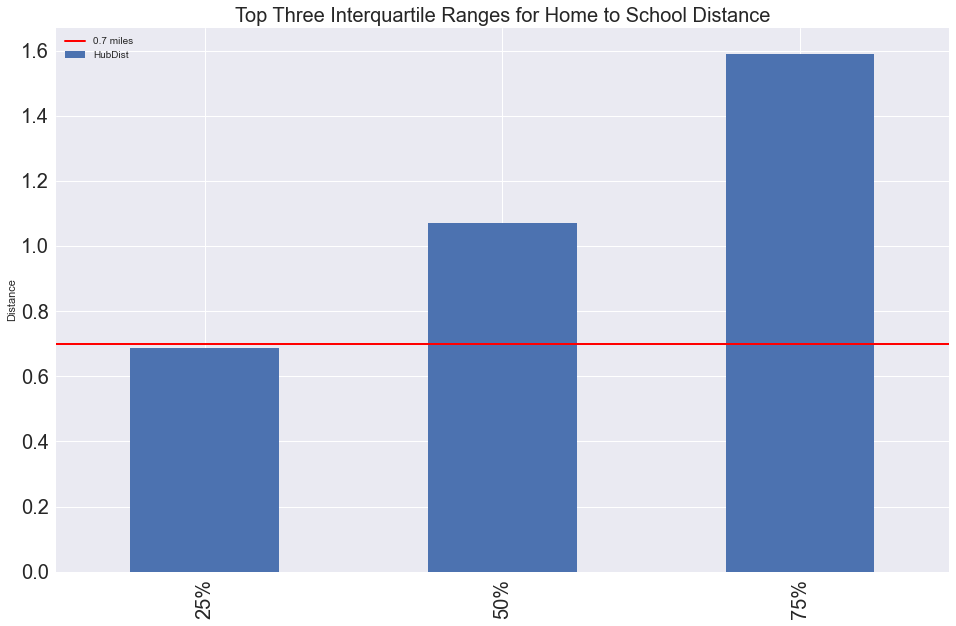

In [27]:
# visualize the hub distance
cleaned_df2.describe()['HubDist'].loc[['25%','50%','75%']].plot.bar(figsize=(16,10), fontsize=20)
plt.axhline(0.7, color='red', label='0.7 miles', linewidth = 2)
plt.title('Top Three Interquartile Ranges for Home to School Distance', fontsize=20)
plt.ylabel('Distance')
plt.legend()

In [28]:
# drop houses' school disctance under 0.7 miles that is shown above
cleaned_df2 = cleaned_df2.loc[cleaned_df2.HubDist <= 0.7]
cleaned_df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,HubName,HubDist
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,False,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,5338,0.687628
11,9212900260,5/27/2014,468000,2,1.00,1160,6000,1.0,False,NONE,...,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,6260,0.544642
13,6054650070,10/7/2014,400000,3,1.75,1370,9680,1.0,False,NONE,...,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208,5338,0.651845
17,6865200140,5/29/2014,485000,4,1.00,1600,4300,1.5,False,NONE,...,0.0,1916,0.0,98103,47.6648,-122.343,1610,4300,5676,0.559904
19,7983200060,4/24/2015,230000,3,1.00,1250,9774,1.0,False,NONE,...,0.0,1969,0.0,98003,47.3343,-122.306,1280,8850,6399,0.576901


# Modeling and Evaluation

### House Price Prediction Modeling

In [29]:
# Model define
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [30]:
# Evaluation with cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train**2, y_train, cv=5)

array([0.75132775, 0.69063972, 0.64892535, 0.72535465, 0.73110131])

In [31]:
# Evaluation with test set
model.fit(X_train**2, y_train)
model.score(X_test**2, y_test)

0.7150335566493079

### Prediction

In [32]:
# Get total data
y_total = pd.concat([y_test, y_train]).sort_index()
X_total = pd.concat([X_test, X_train]).sort_index()

# Predict price
pred = model.predict(X_total**2).round()
cleaned_df['predict_price'] = pred

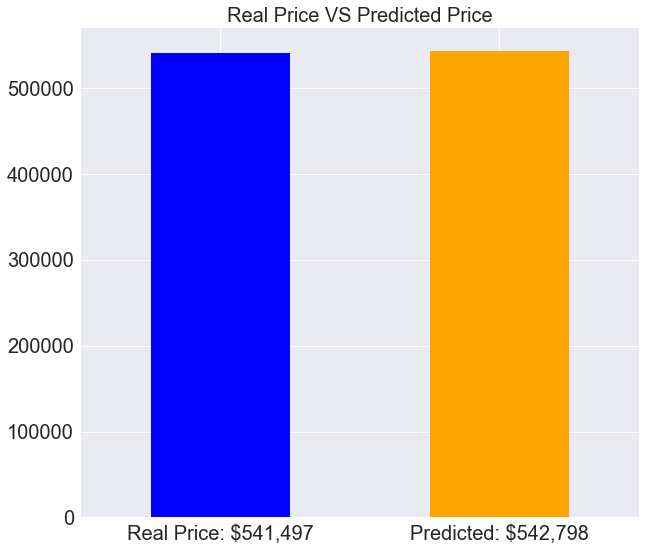

In [33]:
# Visualize the real data with predicted data
average_df = cleaned_df[['price', 'predict_price']].mean()
average_df.plot.bar(fontsize=20, figsize=(10,9), color=['blue', 'orange'])
plt.title('Real Price VS Predicted Price', fontsize=20)
plt.xticks([0,1], ['Real Price: $541,497', 'Predicted: $542,798'], rotation=0)
plt.show()

### Apply to business problem

In [34]:
# Find houses that is under the 60% price that AI predicted
results_df = cleaned_df.loc[cleaned_df.price < cleaned_df.predict_price*0.6, ['id', 'price', 'predict_price', 'lat', 'long']]
results_df

,id,price,predict_price,lat,long
51,7231300125,345000.0,604994.0,47.4934,-122.189
65,3253500160,317625.0,656787.0,47.5747,-122.304
107,3530510041,188500.0,367002.0,47.3813,-122.322
142,1432900240,205000.0,345225.0,47.4563,-122.171
194,3996900125,230000.0,439855.0,47.7481,-122.300
...,...,...,...,...,...
21211,2738640470,623300.0,1207573.0,47.7726,-122.162
21263,6056110780,229800.0,405694.0,47.5647,-122.293
21347,3782760080,410000.0,689145.0,47.7345,-121.967
21420,1608000120,255000.0,430354.0,47.3860,-122.184


In [35]:
# Visualize all houses
import folium

map1 = folium.Map(location=[47.5,-122])
points = (results_df.lat, results_df.long)
lat = points[0]
long = points[1]

for la, lo, real, pred in zip(lat, long, results_df.price, results_df.predict_price):
    iframe = folium.IFrame('price: ${} predict: ${}'.format(real, pred), width=100, height=100)
    popup = folium.Popup(iframe, max_width=100)
    folium.Marker(location=[la,lo],popup=popup).add_to(map1)
    


![png](image/map1.png)

Text(0.5, 1.0, 'Profitable Houses Average Price')

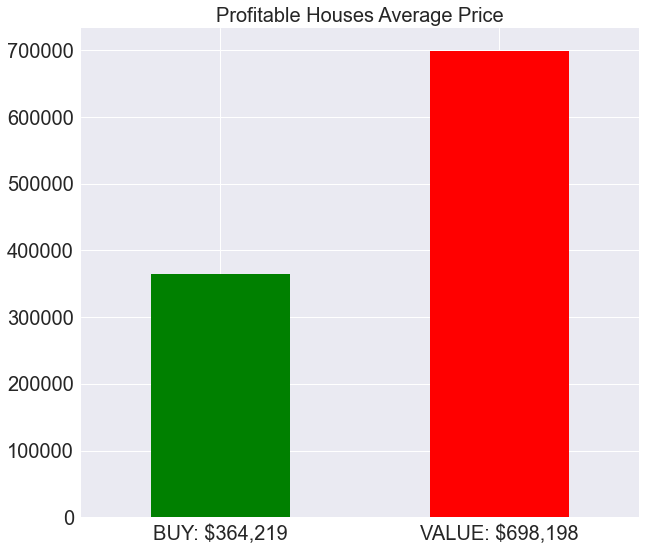

In [36]:
# Available profits
results_df[['price', 'predict_price']].mean().plot.bar(figsize=(10,9), fontsize=20, color=['green', 'red'])
plt.xticks([0,1],['BUY: $364,219', 'VALUE: $698,198'], rotation=0);
plt.title('Profitable Houses Average Price', fontsize=20)

In [37]:
# Visualize houses that is near middle school
results_df = results_df.join(cleaned_df2, how='inner', lsuffix='index')
map2 = folium.Map(location=[47.5,-122])
points = (results_df.lat, results_df.long)
lat = points[0]
long = points[1]

for la, lo, real, pred in zip(lat, long, results_df.price, results_df.predict_price):
    iframe = folium.IFrame('price: ${} predict: ${}'.format(real, pred), width=100, height=100)
    popup = folium.Popup(iframe, max_width=100)
    folium.Marker(location=[la,lo],popup=popup).add_to(map2)

![png](image/map2.png)

Text(0.5, 1.0, 'Profitable Houses Near Middle School')

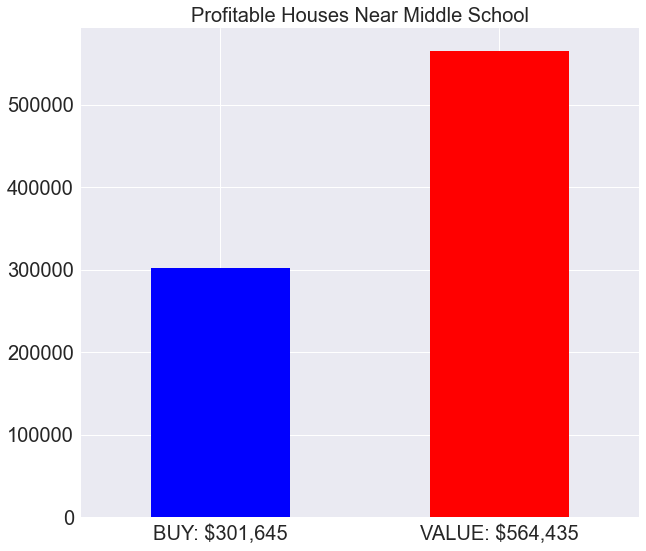

In [38]:
# Available profits
results_df[['price', 'predict_price']].mean().plot.bar(figsize=(10,9), fontsize=20, color=['blue', 'red'])
plt.xticks([0,1],['BUY: $301,645', 'VALUE: $564,435'], rotation=0);
plt.title('Profitable Houses Near Middle School', fontsize=20)

## Conclusion
* 71.5% of the data fit our house price prediction model. 

* The model was able to recommend 507 houses to purchase after finding homes where the actual price was 40% lower than the predicted price. 

* To mitigate the commute time for the middle school child we found how many of the 507 houses fall within 0.7 miles from the closest middle school. We found a final list of100 houses that lie within 0.7 miles from a middle school!